In [1]:
import pandas as pd       
import matplotlib as mat
import matplotlib.pyplot as plt    
import numpy as np
import seaborn as sns
%matplotlib inline

pd.options.display.max_colwidth = 100

import random
import os

from numpy.random import seed
seed(42)

random.seed(42)
os.environ['PYTHONHASHSEED'] = str(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import glob
import cv2

from tensorflow.random import set_seed
set_seed(42)

import warnings
warnings.filterwarnings('ignore')

In [2]:
IMG_SIZE = 224
BATCH = 32
SEED = 42

In [11]:
# Set the paths to the training and validation data
#train_path = 'chest_xray/train'
#valid_path = 'chest_xray/test'


#main_path = "../input/chest-xray-pneumonia/chest_xray/"
main_path = "chest_xray"


train_path = os.path.join(main_path,"train")
test_path=os.path.join(main_path,"test")

train_normal = glob.glob(train_path+"/NORMAL/*.jpeg")
train_pneumonia = glob.glob(train_path+"/PNEUMONIA/*.jpeg")

test_normal = glob.glob(test_path+"/NORMAL/*.jpeg")
test_pneumonia = glob.glob(test_path+"/PNEUMONIA/*.jpeg")

In [12]:
test_pneumonia

['chest_xray/test/PNEUMONIA/person147_bacteria_706.jpeg',
 'chest_xray/test/PNEUMONIA/person100_bacteria_482.jpeg',
 'chest_xray/test/PNEUMONIA/person78_bacteria_382.jpeg',
 'chest_xray/test/PNEUMONIA/person124_bacteria_589.jpeg',
 'chest_xray/test/PNEUMONIA/person1647_virus_2848.jpeg',
 'chest_xray/test/PNEUMONIA/person1675_virus_2891.jpeg',
 'chest_xray/test/PNEUMONIA/person89_bacteria_440.jpeg',
 'chest_xray/test/PNEUMONIA/person35_virus_80.jpeg',
 'chest_xray/test/PNEUMONIA/person122_bacteria_582.jpeg',
 'chest_xray/test/PNEUMONIA/person119_bacteria_565.jpeg',
 'chest_xray/test/PNEUMONIA/person1662_virus_2875.jpeg',
 'chest_xray/test/PNEUMONIA/person85_bacteria_422.jpeg',
 'chest_xray/test/PNEUMONIA/person1669_virus_2884.jpeg',
 'chest_xray/test/PNEUMONIA/person39_virus_85.jpeg',
 'chest_xray/test/PNEUMONIA/person36_virus_81.jpeg',
 'chest_xray/test/PNEUMONIA/person134_bacteria_640.jpeg',
 'chest_xray/test/PNEUMONIA/person138_bacteria_659.jpeg',
 'chest_xray/test/PNEUMONIA/person92

In [13]:
train_list = [x for x in train_normal]
train_list.extend([x for x in train_pneumonia])

df_train = pd.DataFrame(np.concatenate([['Normal']*len(train_normal) , ['Pneumonia']*len(train_pneumonia)]), columns = ['class'])
df_train['image'] = [x for x in train_list]

test_list = [x for x in test_normal]
test_list.extend([x for x in test_pneumonia])

df_test = pd.DataFrame(np.concatenate([['Normal']*len(test_normal) , ['Pneumonia']*len(test_pneumonia)]), columns = ['class'])
df_test['image'] = [x for x in test_list]

In [14]:
df_train

class                                                    image
0        Normal        chest_xray/train/NORMAL/NORMAL2-IM-0927-0001.jpeg
1        Normal        chest_xray/train/NORMAL/NORMAL2-IM-1056-0001.jpeg
2        Normal                chest_xray/train/NORMAL/IM-0427-0001.jpeg
3        Normal        chest_xray/train/NORMAL/NORMAL2-IM-1260-0001.jpeg
4        Normal           chest_xray/train/NORMAL/IM-0656-0001-0001.jpeg
...         ...                                                      ...
5211  Pneumonia      chest_xray/train/PNEUMONIA/person142_virus_288.jpeg
5212  Pneumonia  chest_xray/train/PNEUMONIA/person364_bacteria_1659.jpeg
5213  Pneumonia    chest_xray/train/PNEUMONIA/person1323_virus_2283.jpeg
5214  Pneumonia     chest_xray/train/PNEUMONIA/person772_virus_1401.jpeg
5215  Pneumonia     chest_xray/train/PNEUMONIA/person501_virus_1010.jpeg

[5216 rows x 2 columns]

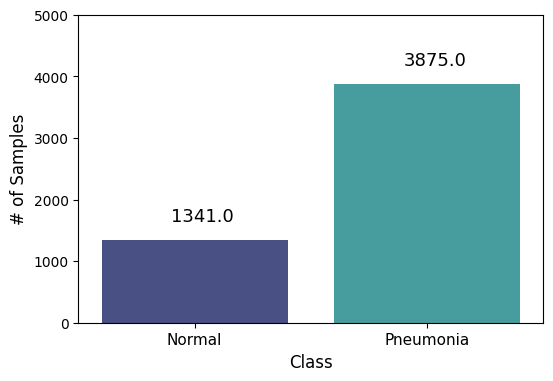

In [15]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x='class', data=df_train, palette="mako")

plt.xlabel("Class", fontsize= 12)
plt.ylabel("# of Samples", fontsize= 12)
plt.ylim(0,5000)
plt.xticks([0,1], ['Normal', 'Pneumonia'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+300), fontsize = 13)
    
plt.show()

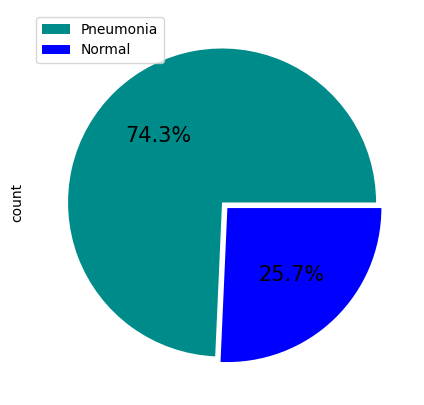

In [16]:
plt.figure(figsize=(7,5))

df_train['class'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['darkcyan','blue'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['Pneumonia', 'Normal'])
plt.show()

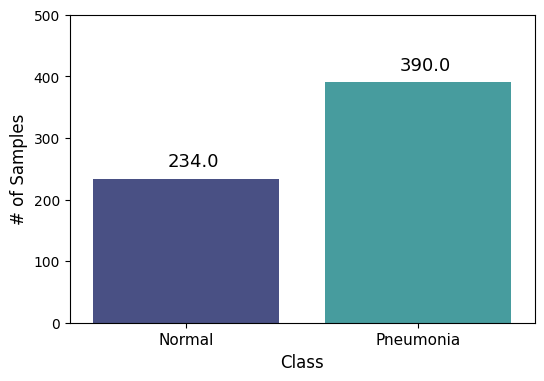

In [17]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x='class', data=df_test, palette="mako")

plt.xlabel("Class", fontsize= 12)
plt.ylabel("# of Samples", fontsize= 12)
plt.ylim(0,500)
plt.xticks([0,1], ['Normal', 'Pneumonia'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+20), fontsize = 13)
    
plt.show()

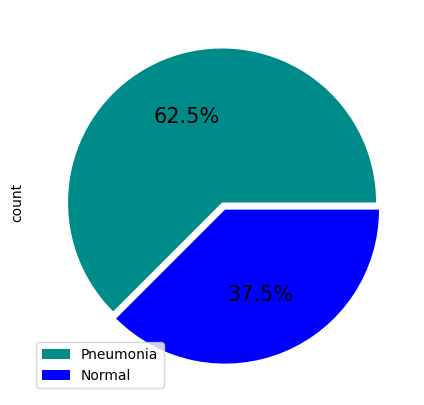

In [18]:
plt.figure(figsize=(7,5))

df_test['class'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['darkcyan','blue'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['Pneumonia', 'Normal'])
plt.show()

Train Set - Normal


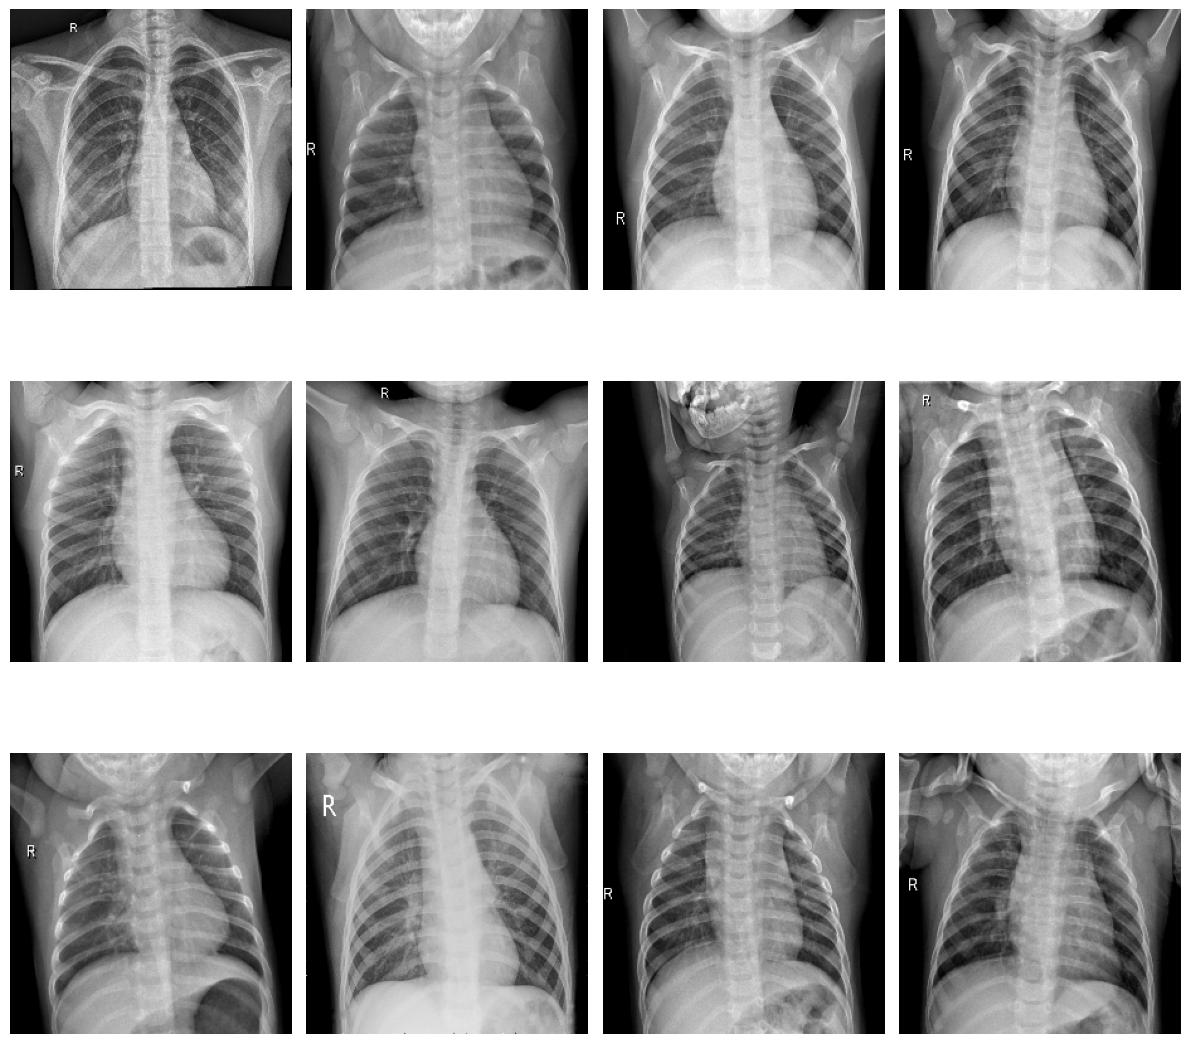

In [19]:
print('Train Set - Normal')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(train_normal[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Train Set - Pneumonia


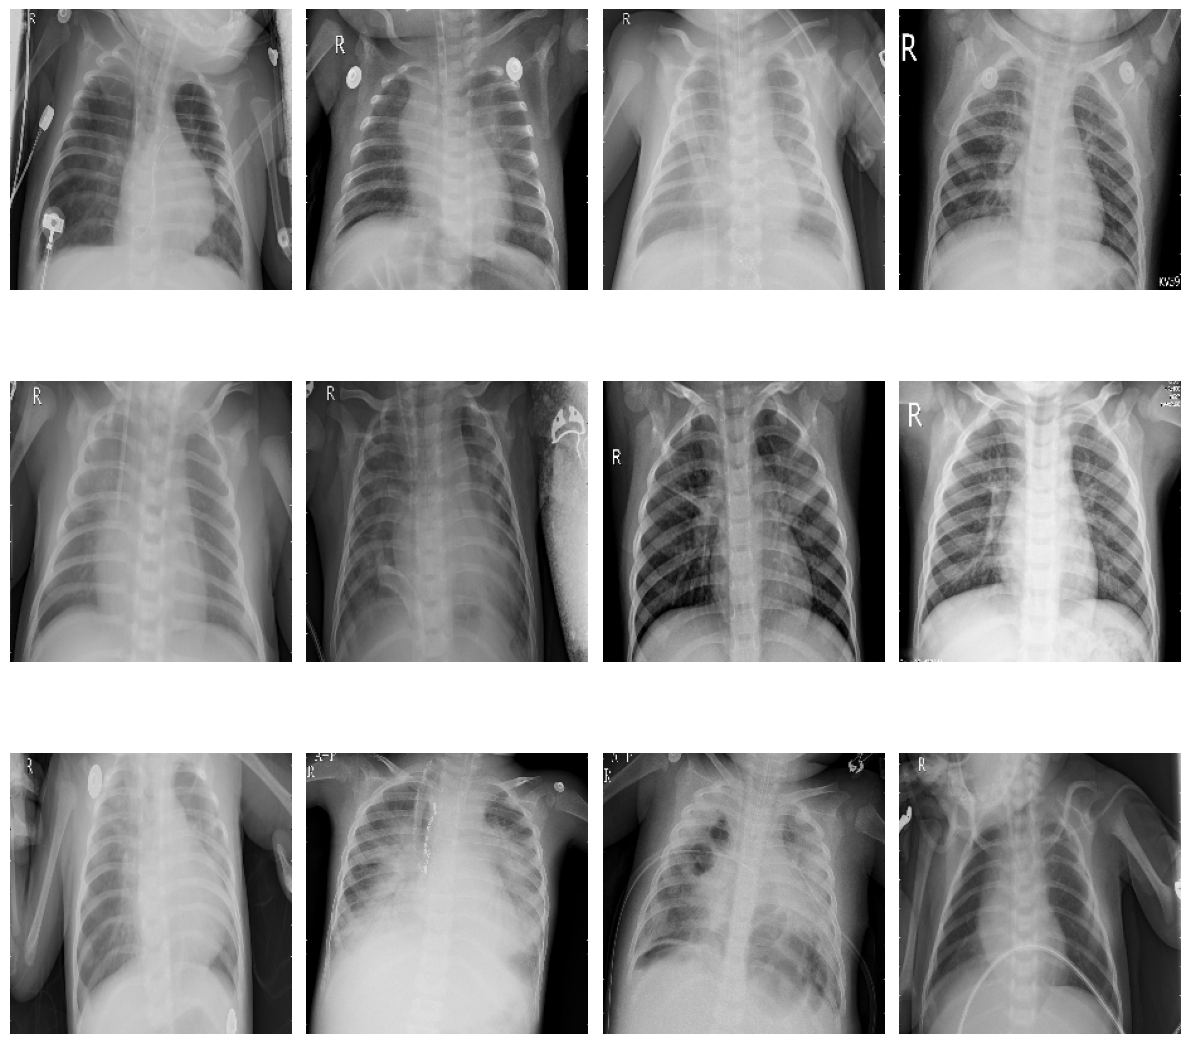

In [20]:
print('Train Set - Pneumonia')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(train_pneumonia[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Test Set - Normal


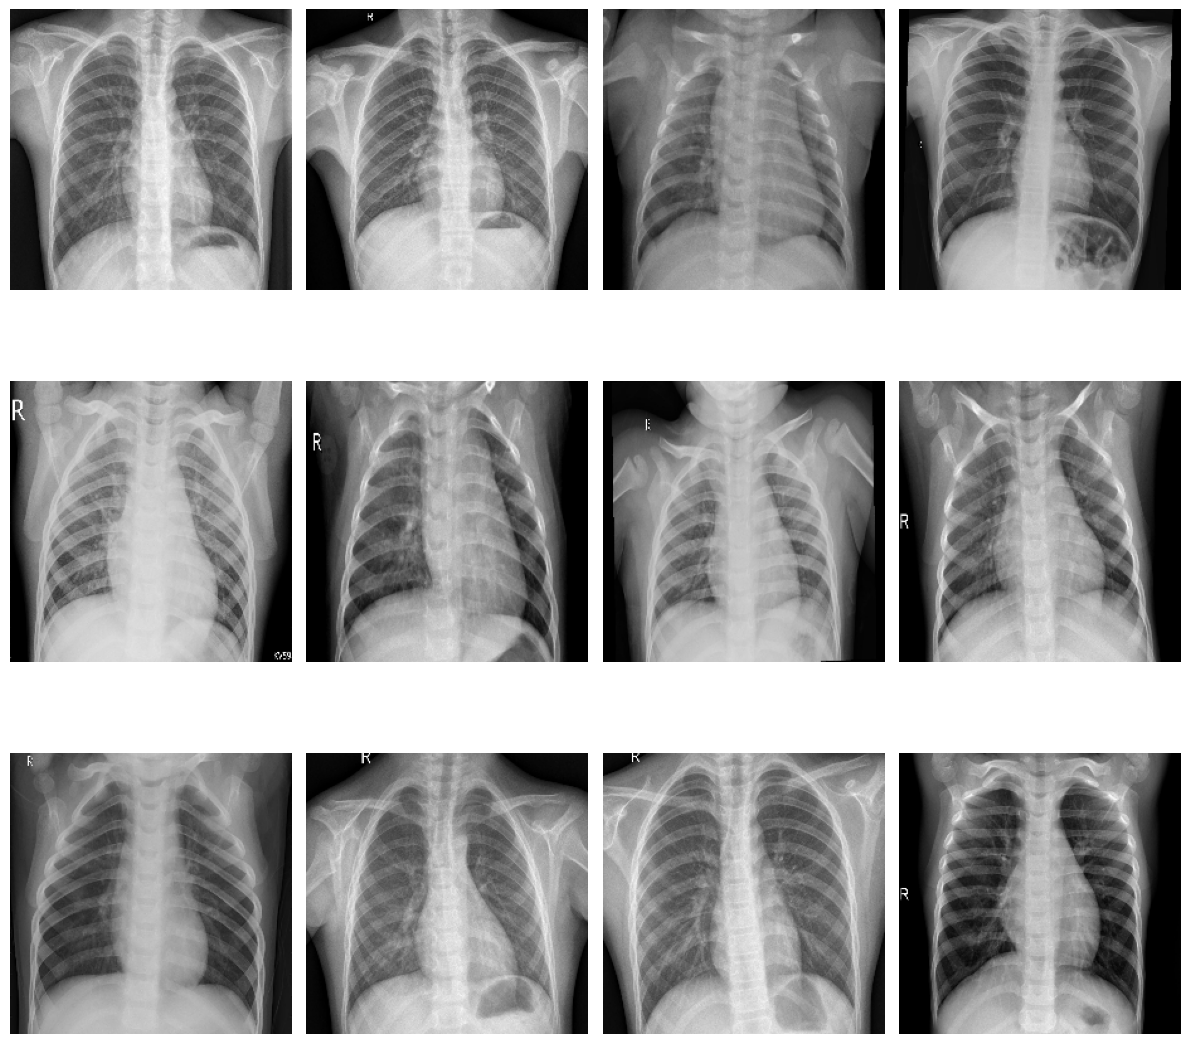

In [21]:
print('Test Set - Normal')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(test_normal[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Test Set - Pneumonia


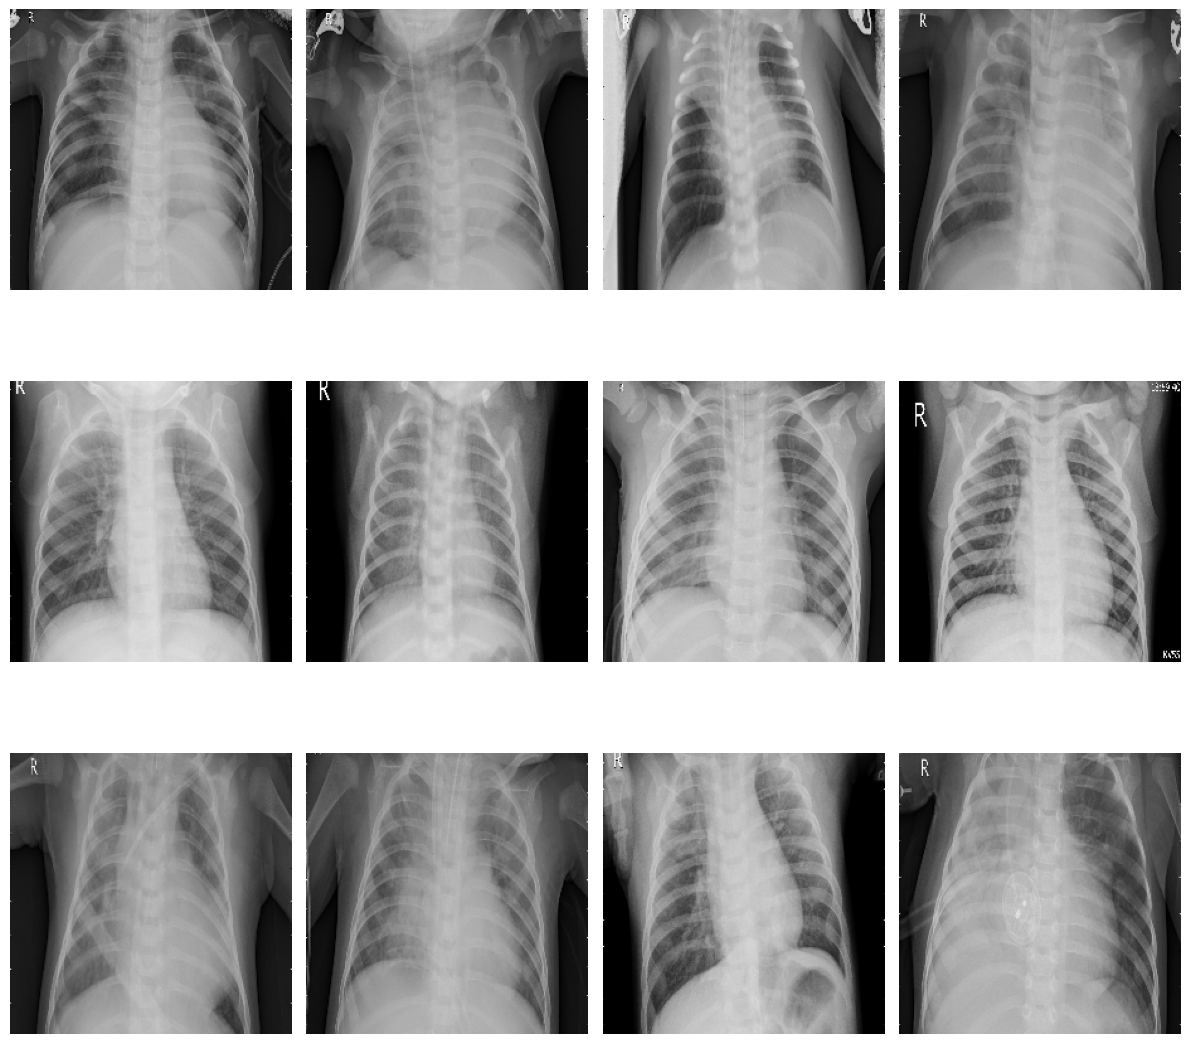

In [22]:
print('Test Set - Pneumonia')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(test_pneumonia[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

In [23]:
train_df, val_df = train_test_split(df_train, test_size = 0.20, random_state = SEED, stratify = df_train['class'])

In [24]:
train_df

class                                                     image
99       Normal                 chest_xray/train/NORMAL/IM-0502-0001.jpeg
1284     Normal                 chest_xray/train/NORMAL/IM-0513-0001.jpeg
5142  Pneumonia      chest_xray/train/PNEUMONIA/person797_virus_1429.jpeg
1365  Pneumonia  chest_xray/train/PNEUMONIA/person1812_bacteria_4667.jpeg
2649  Pneumonia        chest_xray/train/PNEUMONIA/person2_bacteria_3.jpeg
...         ...                                                       ...
4481  Pneumonia  chest_xray/train/PNEUMONIA/person1142_bacteria_3086.jpeg
2404  Pneumonia   chest_xray/train/PNEUMONIA/person568_bacteria_2359.jpeg
705      Normal    chest_xray/train/NORMAL/NORMAL2-IM-0995-0001-0002.jpeg
3732  Pneumonia      chest_xray/train/PNEUMONIA/person796_virus_1428.jpeg
3046  Pneumonia      chest_xray/train/PNEUMONIA/person628_virus_1206.jpeg

[4172 rows x 2 columns]

In [25]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                                  zoom_range = 0.1,
                                  #rotation_range = 0.1,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1)

val_datagen = ImageDataGenerator(rescale=1/255.)

ds_train = train_datagen.flow_from_dataframe(train_df,
                                             #directory=train_path, #dataframe contains the full paths
                                             x_col = 'image',
                                             y_col = 'class',
                                             target_size = (IMG_SIZE, IMG_SIZE),
                                             class_mode = 'binary',
                                             batch_size = BATCH,
                                             seed = SEED)

ds_val = val_datagen.flow_from_dataframe(val_df,
                                            #directory=train_path,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'binary',
                                            batch_size = BATCH,
                                            seed = SEED)

ds_test = val_datagen.flow_from_dataframe(df_test,
                                            #directory=test_path,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'binary',
                                            batch_size = 1,
                                            shuffle = False)

Found 4172 validated image filenames belonging to 2 classes.
Found 1044 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


In [26]:
#Setting callbakcs

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=1e-7,
    restore_best_weights=True,
)

plateau = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor = 0.2,                                     
    patience = 2,                                   
    min_delt = 1e-7,                                
    cooldown = 0,                               
    verbose = 1
) 

In [27]:
def get_model():
    
    #Input shape = [width, height, color channels]
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    
    # Block One
    x = layers.Conv2D(filters=16, kernel_size=3, padding='valid')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)

    # Block Two
    x = layers.Conv2D(filters=32, kernel_size=3, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)
    
    # Block Three
    x = layers.Conv2D(filters=64, kernel_size=3, padding='valid')(x)
    x = layers.Conv2D(filters=64, kernel_size=3, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.4)(x)

    # Head
    #x = layers.BatchNormalization()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    
    #Final Layer (Output)
    output = layers.Dense(1, activation='sigmoid')(x)
    
    model = keras.Model(inputs=[inputs], outputs=output)
    
    return model

In [28]:
keras.backend.clear_session()

model = get_model()
model.compile(loss='binary_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=3e-5), metrics='binary_accuracy')

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 16)      64        
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 222, 222, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 16)      0     

In [29]:
history = model.fit(ds_train,
          batch_size = BATCH, epochs = 50,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/BATCH));

Epoch 1/50
130/130 [==============================] - 106s 804ms/step - loss: 0.4632 - binary_accuracy: 0.7982 - val_loss: 1.1069 - val_binary_accuracy: 0.7433 - lr: 3.0000e-05
Epoch 2/50
130/130 [==============================] - 107s 819ms/step - loss: 0.3140 - binary_accuracy: 0.8615 - val_loss: 1.8415 - val_binary_accuracy: 0.7433 - lr: 3.0000e-05
Epoch 3/50
131/130 [==============================] - ETA: 0s - loss: 0.2619 - binary_accuracy: 0.8854
Epoch 3: ReduceLROnPlateau reducing learning rate to 5.9999998484272515e-06.
130/130 [==============================] - 107s 825ms/step - loss: 0.2619 - binary_accuracy: 0.8854 - val_loss: 1.7863 - val_binary_accuracy: 0.7433 - lr: 3.0000e-05
Epoch 4/50
130/130 [==============================] - 110s 842ms/step - loss: 0.2305 - binary_accuracy: 0.9058 - val_loss: 1.0565 - val_binary_accuracy: 0.7433 - lr: 6.0000e-06
Epoch 5/50
130/130 [==============================] - 112s 858ms/step - loss: 0.2155 - binary_accuracy: 0.9113 - val_loss: 

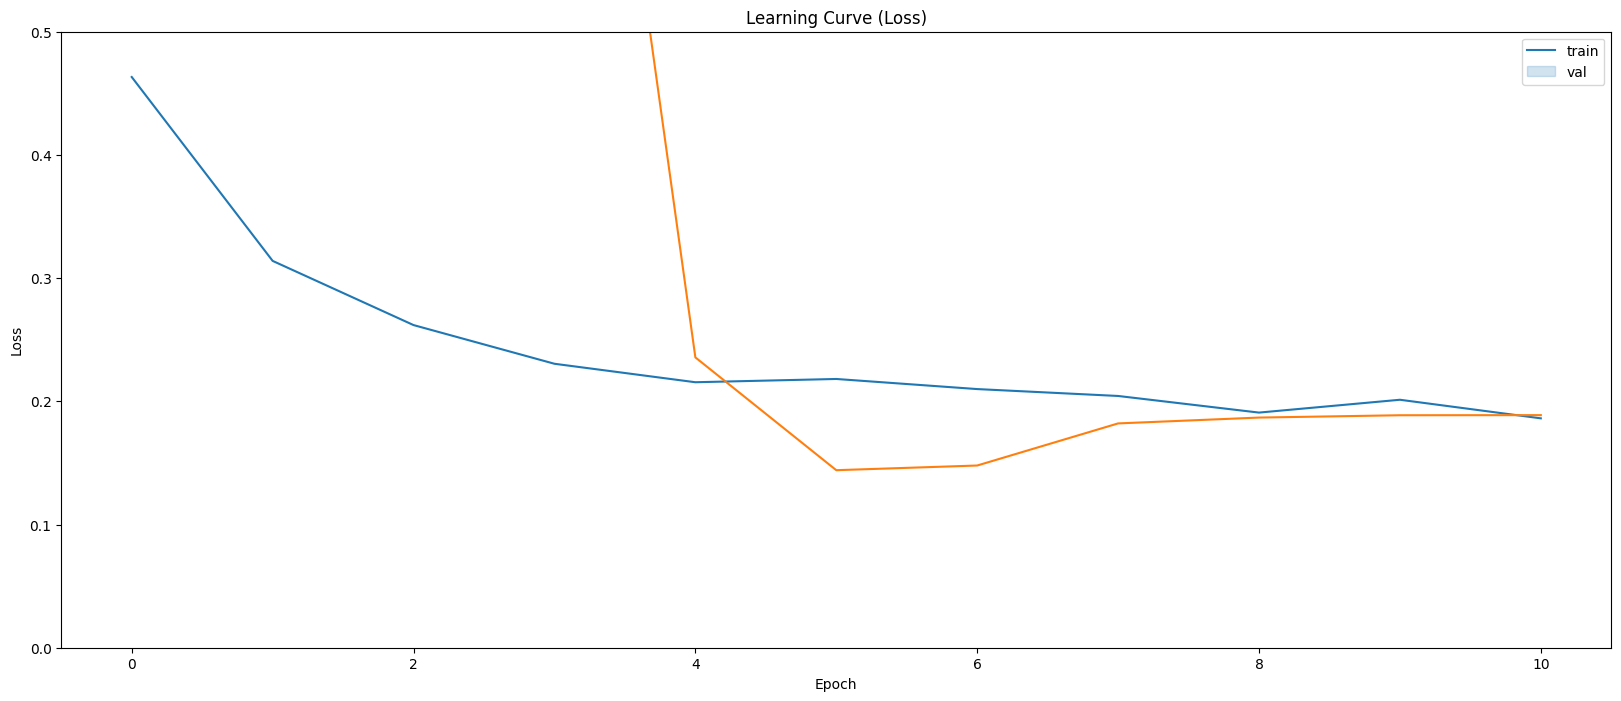

In [30]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.5)
ax.legend(['train', 'val'], loc='best')
plt.show()

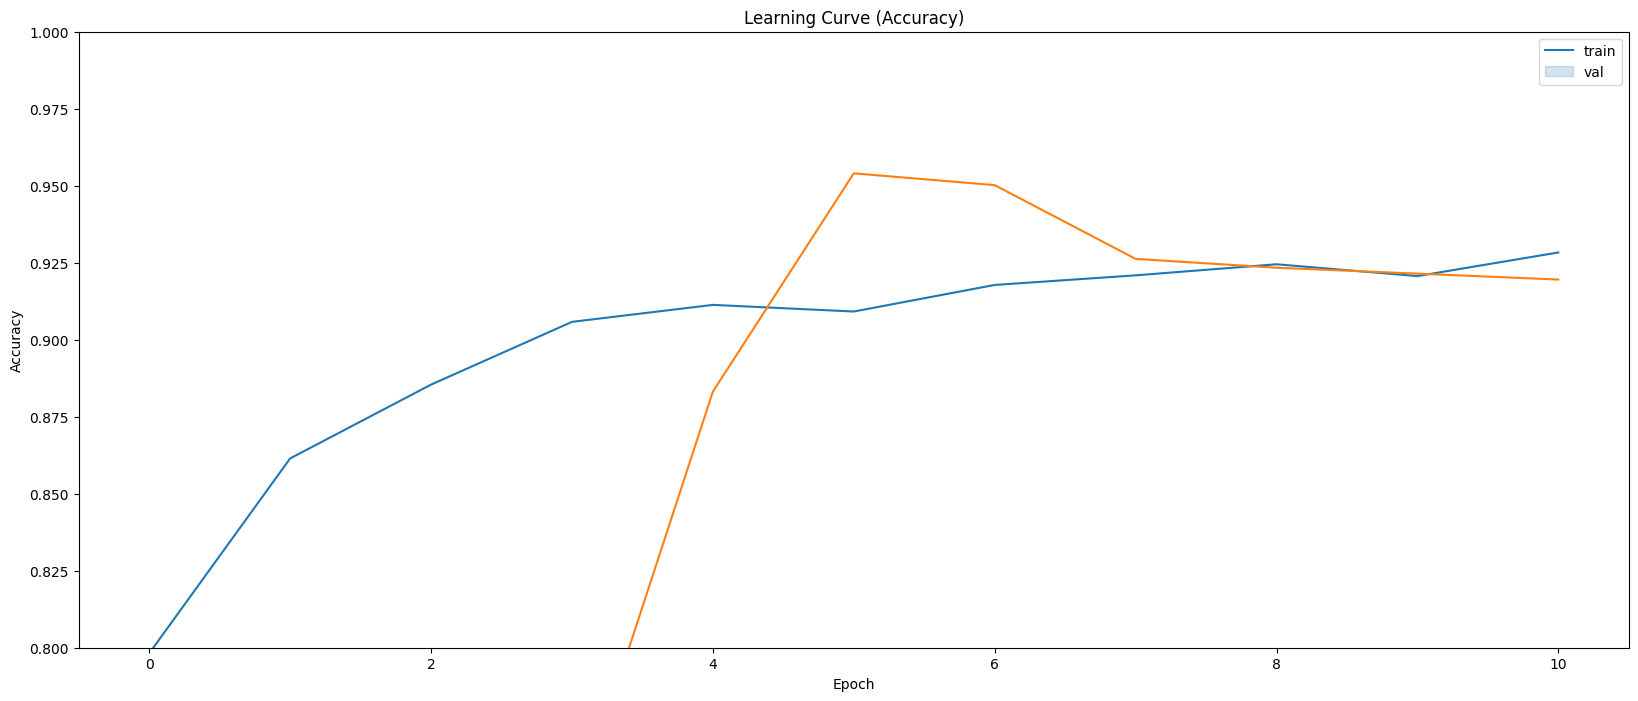

In [31]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['binary_accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_binary_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.80, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [32]:
score = model.evaluate(ds_val, steps = len(val_df)/BATCH, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 0.14410176873207092
Val accuracy: 0.954023003578186


In [33]:
score = model.evaluate(ds_test, steps = len(df_test), verbose = 0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4946938455104828
Test accuracy: 0.7980769276618958
